# Aims
This notebook is created to 
- build the double mass curve method
- quantify the contributions to water yield
- create figures in main text and supplementary

In [2]:
# load packages
import numpy   as np
import pandas  as pd
import seaborn as sns
from DMC_functions import *

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# define the background
plt.style.use('ggplot')
plt.rc('xtick', direction='in', color='k')
plt.rc('ytick', direction='in', color='k')
plt.rc('axes', facecolor='#E6E6E6', edgecolor='k', axisbelow=True, grid=True)

In [3]:
def convert_data(df):
    # convert the Year(int64) to Year(datetime64[ns])
    df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'], format='%Y')
    # set the datetime object as the index of the dataframe
    df = df.set_index('Unnamed: 0')
    df.index.name = 'Year'
    return df

def sel_time_range(df, start, end):
    # Usage: df = sel_time_range(df, '03-01-1991', '06-01-1997')
    # Note: MM-DD-YYYY
    mask = (df.index >= start) & (df.index <= end)
    df = df.loc[mask]
    return df

In [4]:
# climate
pre = pd.read_excel('../01-data/analysis/year_pre.xlsx')    # from 10km daily precipitation
aet = pd.read_excel('../01-data/analysis/year_aet.xlsx')    # from GLEAM 
# vegetation
lai = pd.read_excel('../01-data/analysis/year_lai.xlsx')    # from GIMMS
# runoff
wy  = pd.read_excel('../01-data/analysis/year_wyd.xlsx')    # from obseravtion
# maximum temperature
tmax= pd.read_excel('../01-data/analysis/year_tmax.xlsx')   # from CMADS

# pre-process data
pre = convert_data(pre) 
aet = convert_data(aet) 
lai = convert_data(lai)
wy  = convert_data(wy) 
tmax= convert_data(tmax)
# select the time range
start = '01-01-1982'
end   = '12-01-2013'
pre = sel_time_range(pre,  start=start, end=end)
aet = sel_time_range(aet,  start=start, end=end)
lai = sel_time_range(lai,  start=start, end=end)
wy  = sel_time_range(wy ,  start=start, end=end)
tmax= sel_time_range(tmax, start=start, end=end)
# effective precipitation
ep  = pre - aet
names = ['HYZR','UYZR','NCR', 'MYZR', 'LSR', 'LYZR']
order = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

tp = [13, 16, 15, 15, 14, 15]

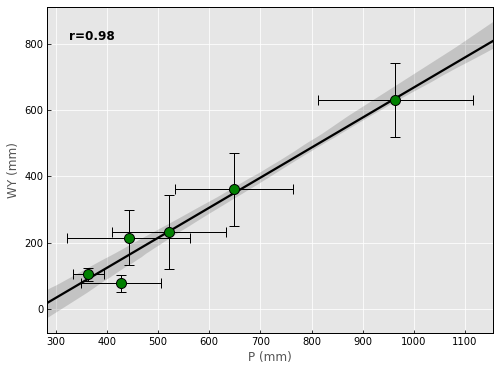

In [5]:
fig = plt.figure(figsize=(8,6))
ax  = plt.subplot(1,1,1) 
# correlation
pre_mean = pre.mean(); pre_std  = pre.std()
wy_mean  = wy.mean() ; wy_std   = wy.std()
# error bar
plt.errorbar(x=pre_mean, y=wy_mean, xerr=pre_std, yerr=wy_std, fmt='o', ms=10, color='g', markeredgecolor='k', ecolor='k', elinewidth=1, capsize=5, fillstyle='full')
# error line
sns.regplot(x=pre_mean, y=wy_mean, color='k', ci=80, truncate=False, marker='')

plt.text(0.05, 0.90, 'r=%.2f'%np.corrcoef(pre_mean, wy_mean)[0,1], color='k', fontsize=12, transform=ax.transAxes, weight='bold')

# labels
plt.xlabel('P (mm)', fontsize=12); plt.ylabel('WY (mm)', fontsize=12)
# save
plt.savefig('../03-res/02-figures/pre-and-water-yield.png',dpi=300, bbox_inches='tight')

# DMC prediction

## Model examples

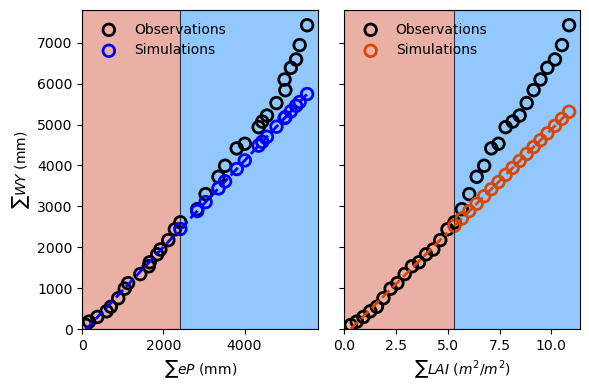

In [22]:
from matplotlib.ticker import MaxNLocator
from DMC_functions import *

fig = plt.figure(figsize=(6,4))
plt.style.use('default')

i=3
name = names[i]
syear = 1982
eyear = 2013

# ax1: ep and wy
ax = plt.subplot(1,2,1)
x = ep[name]
y = wy[name]
# calculation
xo, yo, xo_cum1, xo_cum2, yo_cum1, yo_cum2, yp_cum1, yp_cum2, y_atd, y_afd, y_acd, y_td, y_fd, y_cd = dmc_prediction(x, y, tp[i])
# point ax
ax.add_patch(plt.Rectangle((0,0), xo_cum2.min(), 1, transform = ax.get_xaxis_transform(), color='#d6604d', alpha=0.5))
ax.add_patch(plt.Rectangle((xo_cum2.min(),0), xo_cum2.max(), 1, transform = ax.get_xaxis_transform(), color='#62B1FF', alpha=0.7))
plt.axvline(xo_cum2.min(), color='k', lw=0.5)
plt.scatter(xo_cum1, yo_cum1, color='k', lw=2, s=70, facecolors="None", label='Observations')
plt.scatter(xo_cum2, yo_cum2, color='k', lw=2, s=70, facecolors="None")
# plot predicted lines
plt.plot(xo_cum1, yp_cum1, '--', color='blue', lw=2)
plt.plot(xo_cum2, yp_cum2, '--', color='blue', lw=2)
plt.scatter(xo_cum2, yp_cum2, color='blue', lw=2, s=70, facecolors="None", label='Simulations')

plt.legend(frameon=False, loc='upper left')

ax.set_ylabel('$\sum WY$ '  + '(mm)', color='k')
ax.set_xlabel('$\sum eP$ '  + '(mm)', color='k')

#plt.text(0.02, 0.9, 'Before TP', color='#d6604d', weight='bold', transform=ax.transAxes)
#plt.text(0.45, 0.9, 'After TP',  color='#2171b5', weight='bold', transform=ax.transAxes)

ax.set_xlim(left=0); ax.set_ylim(bottom=0)

# ax2: lai and wy
ax = plt.subplot(1,2,2)
x = lai[name]
y = wy[name]
# calculation
xo, yo, xo_cum1, xo_cum2, yo_cum1, yo_cum2, yp_cum1, yp_cum2, y_atd, y_afd, y_acd, y_td, y_fd, y_cd = dmc_prediction(x, y, tp[i])
# point ax
ax.add_patch(plt.Rectangle((0,0), xo_cum2.min(), 1, transform = ax.get_xaxis_transform(), color='#d6604d', alpha=0.5))
ax.add_patch(plt.Rectangle((xo_cum2.min(),0), xo_cum2.max(), 1, transform = ax.get_xaxis_transform(), color='#62B1FF', alpha=0.7))
plt.axvline(xo_cum2.min(), color='k', lw=0.5)
plt.scatter(xo_cum1, yo_cum1, color='k', lw=2, s=70, facecolors="None", label='Observations')
plt.scatter(xo_cum2, yo_cum2, color='k', lw=2, s=70, facecolors="None")
# plot predicted lines
plt.plot(xo_cum1, yp_cum1, '--', color='#d94801', lw=2)
plt.plot(xo_cum2, yp_cum2, '--', color='#d94801', lw=2)
plt.scatter(xo_cum2, yp_cum2, color='#d94801', lw=2, s=70, facecolors="None", label='Simulations')
ax.yaxis.set_ticklabels([])

plt.legend(frameon=False, loc='upper left')
#ax.set_ylabel('$\sum WY$ '  + '(mm)', color='k')
ax.set_xlabel('$\sum LAI$ ' + '$(m^2/m^2)$', color='k')

ax.set_xlim(left=0); ax.set_ylim(bottom=0)

plt.tight_layout()
# save
plt.savefig('../03-res/02-figures/example-fig1.png', dpi=300, bbox_inches='tight')

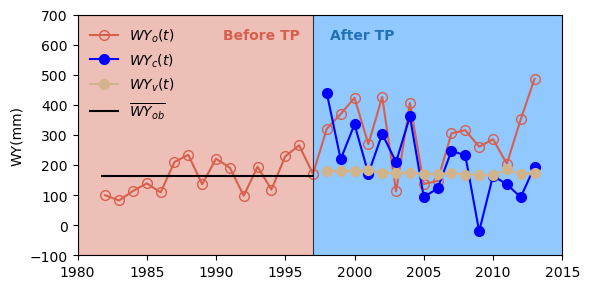

In [23]:
from matplotlib.ticker import MaxNLocator
from DMC_functions import *

fig = plt.figure(figsize=(6,3))
plt.style.use('default')

i=3
name = names[i]
syear = 1982
eyear = 2013

# ax1: ep and wy
ax = plt.subplot(1,1,1)

ax.add_patch(plt.Rectangle((0,0), tp[i]+1982, 1, transform = ax.get_xaxis_transform(), color='#d6604d', alpha=0.4))
ax.add_patch(plt.Rectangle((tp[i]+1982, 0), 2014, 1, transform = ax.get_xaxis_transform(), color='#62B1FF', alpha=0.7))

plt.plot(np.arange(1982,2013+1), y, '-o', color='#d6604d', mfc='none', ms=7, label='$WY_o(t)$')

y = wy[name]

# calculation ep contribution
x = ep[name]
y = wy[name]
xo, yo, xo_cum1, xo_cum2, yo_cum1, yo_cum2, yp_cum1, yp_cum2, y_atd, y_afd, y_acd, y_td, y_fd, y_cd = dmc_prediction(x, y, tp[i])
# plot
plt.plot(np.arange(1982+tp[i]+1, 2013+1), np.diff(yp_cum2), '-o', color='blue', ms=7, label='$WY_c(t)$')

# calculation LAI contribution
x = lai[name]
y = wy[name]
xo, yo, xo_cum1, xo_cum2, yo_cum1, yo_cum2, yp_cum1, yp_cum2, y_atd, y_afd, y_acd, y_td, y_fd, y_cd = dmc_prediction(x, y, tp[i])
# plot
plt.plot(np.arange(1982+tp[i]+1, 2013+1), np.diff(yp_cum2), '-o', color='tan', ms=7, label='$WY_v(t)$')

plt.ylim([-100, 700]); plt.xlim([1980,2015])
plt.axvline(1982+tp[i], color='k', lw=0.5)

plt.ylabel('WY' + '(mm)', color='k')

# plot horizonal lines
plt.axhline(y=np.nanmean(y[0:(tp[i]+1)]), xmin=0.05, xmax=0.485, color='k', label='$\overline{WY_{ob}}$')

plt.legend(frameon=False, loc='upper left')

plt.text(0.30, 0.9, 'Before TP', color='#d6604d', weight='bold', transform=ax.transAxes)
plt.text(0.52, 0.9, 'After TP',  color='#2171b5', weight='bold', transform=ax.transAxes)

plt.tight_layout()
# save
plt.savefig('../03-res/02-figures/example-fig2.png', dpi=300, bbox_inches='tight')

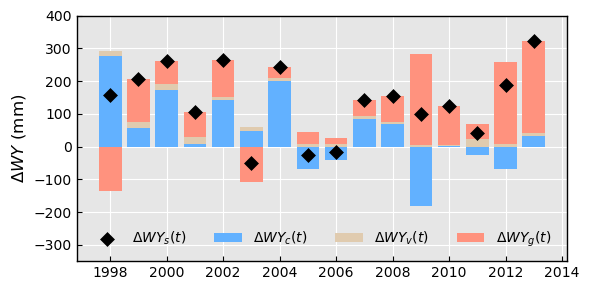

In [24]:
plt.style.use('ggplot')
plt.rc('xtick', direction='in', color='k')
plt.rc('ytick', direction='in', color='k')
plt.rc('axes', facecolor='#E6E6E6', edgecolor='k', axisbelow=True, grid=True)

climate_effects    = pd.read_excel('../01-data/analysis/output_climate_deviation.xlsx'   , index_col=0)
vegetation_effects = pd.read_excel('../01-data/analysis/output_vegetation_deviation.xlsx', index_col=0)

# x variable
x = np.arange(tp[i]+syear+1, eyear+1, 1)
# y variable
## climate
clima = (climate_effects[climate_effects.index == names[i]]['climate']).values
## vegetation
veget = (vegetation_effects[vegetation_effects.index == names[i]]['climate']).values
## cryosphere
other = climate_effects[climate_effects.index == names[i]]['total'].values - (clima + veget)
## total
total = (climate_effects[climate_effects.index == names[i]]['total']).values

# prepare data for plotting stacked bars
data = np.zeros([3, 32-tp[i]-1])*np.nan
data[0,:] = clima
data[1,:] = veget
data[2,:] = other
data_shape = np.shape(data)

def get_cumulated_array(data, **kwargs):
    # Take negative and positive data apart and cumulate
    cum = data.clip(**kwargs)
    cum = np.cumsum(cum, axis=0)
    d = np.zeros(np.shape(data))
    d[1:] = cum[:-1]
    return d 
# cimulated values
cumulated_data     = get_cumulated_array(data, min=0)
cumulated_data_neg = get_cumulated_array(data, max=0)
# Re-merge negative and positive data.
row_mask = (data<0)
cumulated_data[row_mask] = cumulated_data_neg[row_mask]
data_stack = cumulated_data

# point ax
fig = plt.figure(figsize=(6,3))
ax = plt.subplot(111)
colors = ["#62B1FF", "#E0CBAF", "#FF927E"]
labels = ['$\Delta WY_c(t)$', '$\Delta WY_v(t)$', '$\Delta WY_g(t)$']
# 1. plot bar
for j in np.arange(0, data_shape[0]):
    ax.bar(x, data[j], bottom=data_stack[j], color=colors[j], width=0.8, label=labels[j])
# 2. plot scatter
plt.scatter(x, total, marker='D', s=50, color='k', zorder=10, label='$\Delta WY_s(t)$')

ax.set_ylabel('$\Delta WY$ '  + '(mm)', color='k')
plt.ylim([-350, 400])
plt.legend(frameon=False, loc='lower center', ncol=4)

plt.tight_layout()
# save 
plt.savefig('../03-res/02-figures/example-fig3.png', dpi=300, bbox_inches='tight')

## Model analysis

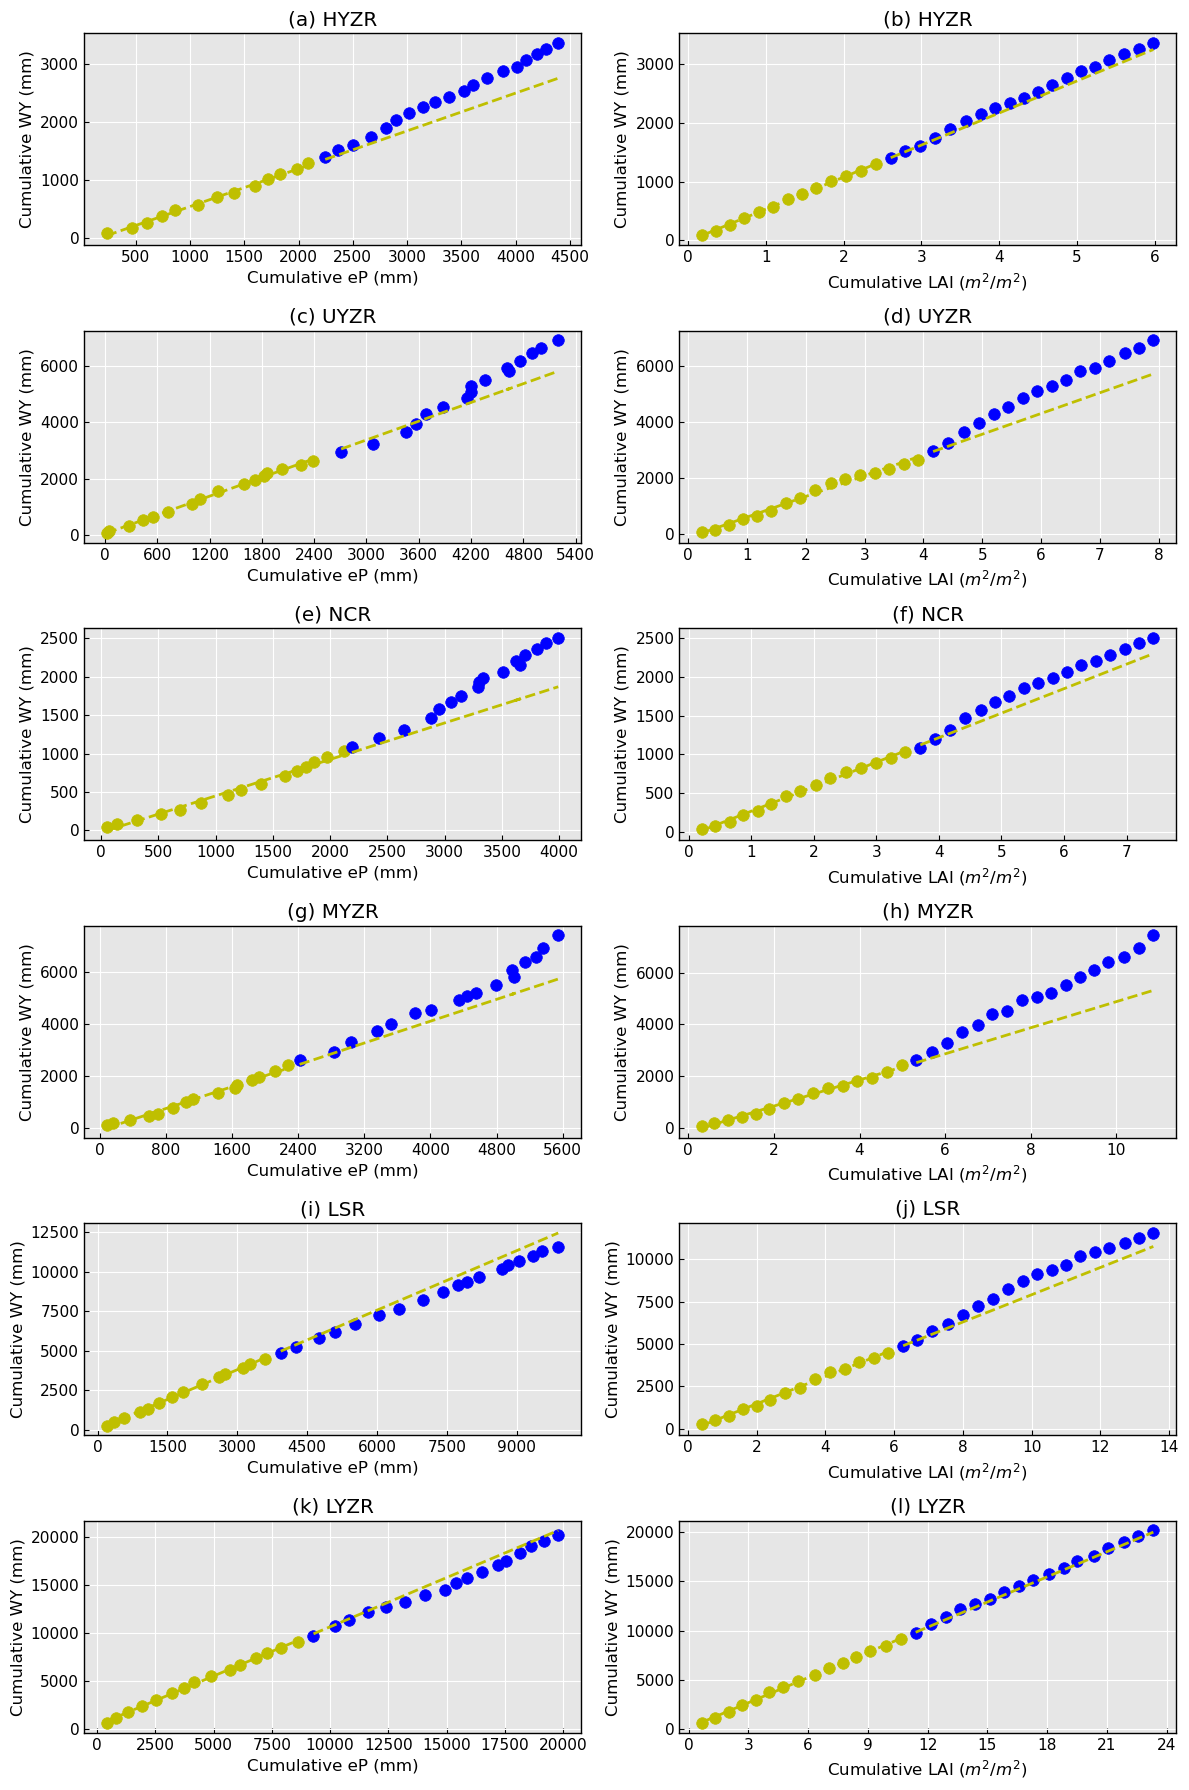

In [28]:
from DMC_functions import *
from matplotlib.ticker import MaxNLocator
order1 = ['(a)', '(c)', '(e)', '(g)', '(i)', '(k)']
order2 = ['(b)', '(d)', '(f)', '(h)', '(j)', '(l)']
fig = plt.figure(figsize=(12,18))

for i in range(6):
    # arguments setting
    name = names[i]
    syear = 1982
    eyear = 2013
    
    # ax1: ep and wy
    x = ep[name]
    y = wy[name]
    # calculation
    xo, yo, xo_cum1, xo_cum2, yo_cum1, yo_cum2, yp_cum1, yp_cum2, y_atd, y_afd, y_acd, y_td, y_fd, y_cd = dmc_prediction(x, y, tp[i])
    # point ax
    ax1 = plt.subplot(6,2,(2*i+1))
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
    dmc_plot_predline(xo_cum1, xo_cum2, yo_cum1, yo_cum2, yp_cum1, yp_cum2)
    
    ax1.set_ylabel('Cumulative WY (mm)' , color='k')
    ax1.set_xlabel('Cumulative eP (mm)', color='k')
    ax1.set_title(order1[i] + ' ' + names[i], color='k')

    # ax2: lai and wy
    x = lai[name]
    y = wy[name]
    # calculation
    xo, yo, xo_cum1, xo_cum2, yo_cum1, yo_cum2, yp_cum1, yp_cum2, y_atd, y_afd, y_acd, y_td, y_fd, y_cd = dmc_prediction(x, y, tp[i])
    # point ax
    ax2 = plt.subplot(6,2,(2*i+2))
    ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
    dmc_plot_predline(xo_cum1, xo_cum2, yo_cum1, yo_cum2, yp_cum1, yp_cum2)

    ax2.set_ylabel('Cumulative WY (mm)' , color='k')
    ax2.set_xlabel('Cumulative LAI ' + r'$(m^2/m^2)$', color='k')
    ax2.set_title(order2[i] + ' ' + names[i], color='k')

    for ax in fig.axes:
        ax.tick_params(labelsize=11)

plt.tight_layout()
# save 
plt.savefig('../03-res/02-figures/DMC-predictive-lines.png', dpi=300, bbox_inches='tight')

# Contribution analysis

In [29]:
# 1. attribute climate effects by eP and WY
r_fd = []; r_cd = []; r_td = []; r_ob = []; index = []
for i in range(len(names)):
    name = names[i]
    x = pre[name]-aet[name]; y = wy[name]
    syear = 1982; eyear = 2013
    xo, yo, xo_cum1, xo_cum2, yo_cum1, yo_cum2, yp_cum1, yp_cum2, y_atd, y_afd, y_acd, y_td, y_fd, y_cd = dmc_prediction(x, y, tp[i])
    r_fd.extend(y_fd[:]); r_cd.extend(y_cd[:]); r_td.extend(y_td[:]); r_ob.extend(yo[tp[i]+1:]); index.extend(np.repeat(name, eyear-syear-tp[i]))
# convert it to dataframe
data = np.array([r_fd, r_cd, r_td, r_ob])
data = pd.DataFrame(data.T, columns=['forest', 'climate', 'total', 'observed'], index=index)
# export data
data.to_excel('../01-data/analysis/output_climate_deviation.xlsx')

In [30]:
# 2. attribute vegetation effects by LAI and WY
r_fd = []; r_cd = []; r_td = []; r_ob = []; index = []
for i in range(len(names)):
    name = names[i]
    x = lai[name]; y = wy[name]
    syear = 1982; eyear = 2013
    xo, yo, xo_cum1, xo_cum2, yo_cum1, yo_cum2, yp_cum1, yp_cum2, y_atd, y_afd, y_acd, y_td, y_fd, y_cd = dmc_prediction(x, y, tp[i])
    r_fd.extend(y_fd[:]); r_cd.extend(y_cd[:]); r_td.extend(y_td[:]); r_ob.extend(yo[tp[i]+1:]); index.extend(np.repeat(name, eyear-syear-tp[i]))
# convert it to dataframe
data = np.array([r_fd, r_cd, r_td, r_ob])
data =  pd.DataFrame(data.T, columns=['forest', 'climate', 'total', 'observed'], index=index)
# export data
data.to_excel('../01-data/analysis/output_vegetation_deviation.xlsx')

# how to index
# data[data.index == 'HYZR']['climate']

In [31]:
climate_effects    = pd.read_excel('../01-data/analysis/output_climate_deviation.xlsx'   , index_col=0)
vegetation_effects = pd.read_excel('../01-data/analysis/output_vegetation_deviation.xlsx', index_col=0)

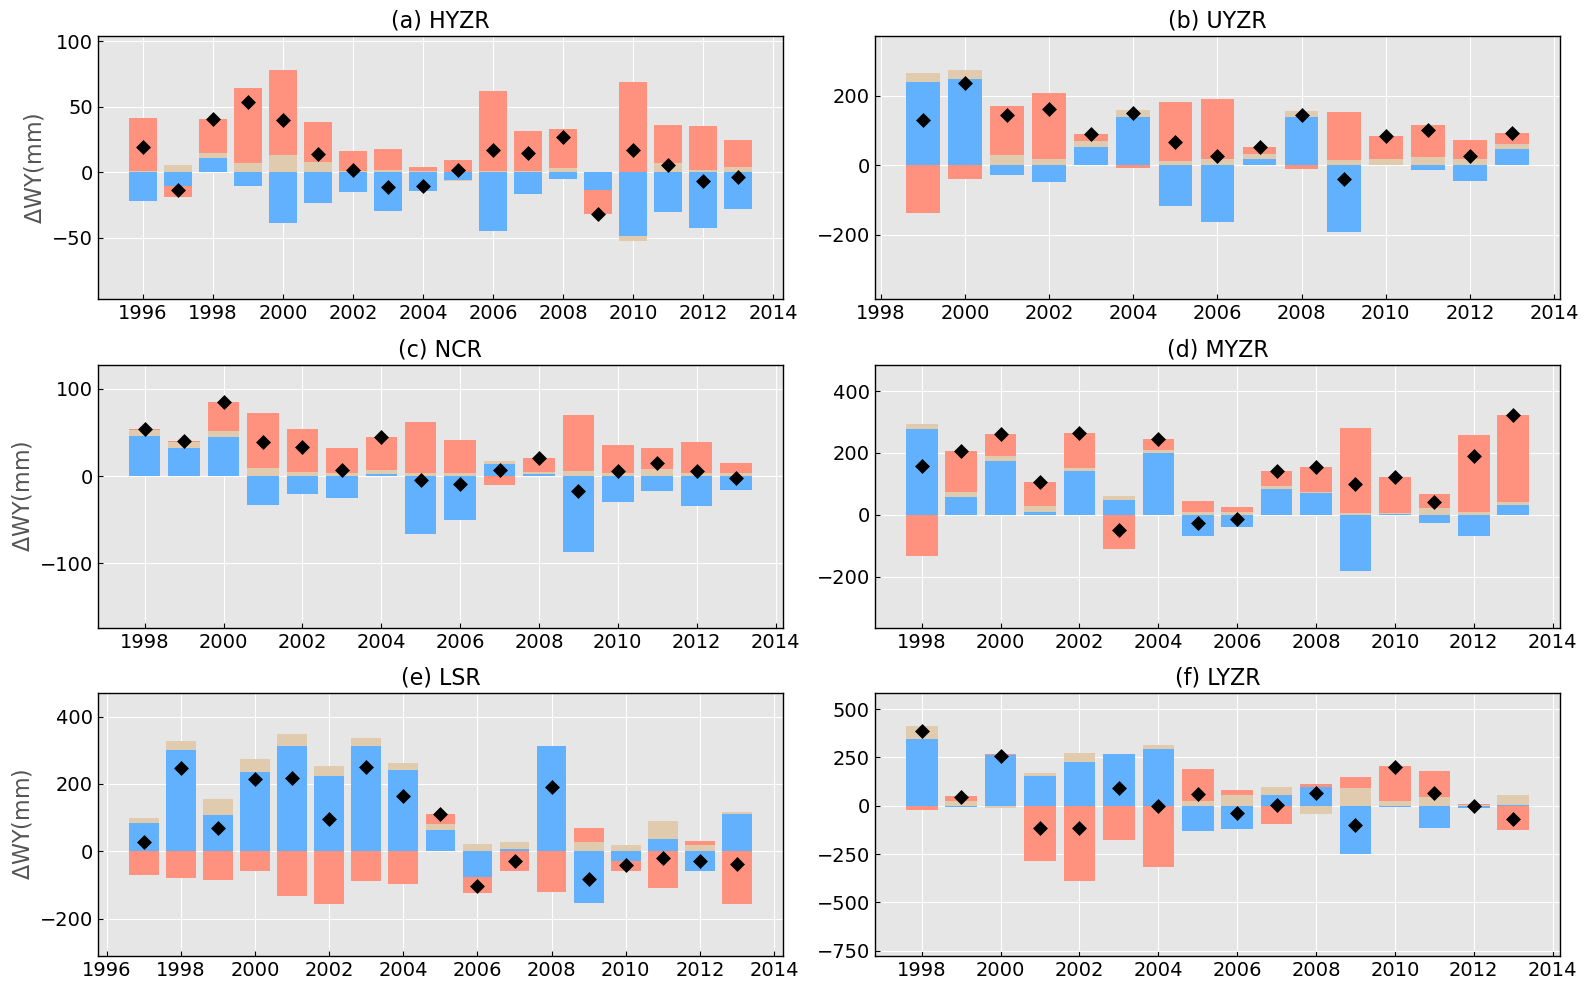

In [34]:
"""
#62B1FF: precipitation; #E0CBAF: vegetation; #FF927E: croysphere
"""
fig = plt.figure(figsize=(16,10))
for i in range(len(names)):
    # preparation
    syear = 1982; eyear = 2013
    # x variable
    x = np.arange(tp[i]+syear+1, eyear+1, 1)
    # y variable
    ## climate
    clima = (climate_effects[climate_effects.index == names[i]]['climate']).values
    ## vegetation
    veget = (vegetation_effects[vegetation_effects.index == names[i]]['climate']).values
    ## cryosphere
    other = climate_effects[climate_effects.index == names[i]]['total'].values - (clima + veget)
    ## total
    total = (climate_effects[climate_effects.index == names[i]]['total']).values

    # prepare data for plotting stacked bars
    data = np.zeros([3, 32-tp[i]-1])*np.nan
    data[0,:] = clima
    data[1,:] = veget
    data[2,:] = other
    data_shape = np.shape(data)

    def get_cumulated_array(data, **kwargs):
        # Take negative and positive data apart and cumulate
        cum = data.clip(**kwargs)
        cum = np.cumsum(cum, axis=0)
        d = np.zeros(np.shape(data))
        d[1:] = cum[:-1]
        return d 
    # cimulated values
    cumulated_data     = get_cumulated_array(data, min=0)
    cumulated_data_neg = get_cumulated_array(data, max=0)
    # Re-merge negative and positive data.
    row_mask = (data<0)
    cumulated_data[row_mask] = cumulated_data_neg[row_mask]
    data_stack = cumulated_data

    # point ax
    ax = plt.subplot(3,2,i+1)
    colors = ["#62B1FF", "#E0CBAF", "#FF927E"]
    # 1. plot bar
    for j in np.arange(0, data_shape[0]):
        ax.bar(x, data[j], bottom=data_stack[j], color=colors[j], width=0.8)
    # 2. plot scatter
    plt.scatter(x, total, marker='D', s=50, color='k', zorder=10)
    
    # 3. settings
    ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
    ax.tick_params(axis='both', which='major', labelsize=11)

    ax.set_ylim([2*np.min([clima,veget,other,total]), 1.5*np.max([clima,veget,other,total])])

    ax.set_title(order[i] + ' ' + names[i], color='k', fontsize=16)
    
    ## settings
    if i == 0 or i == 2 or i == 4:
        ax.set_ylabel(r'$\Delta$WY(mm)', fontsize=16)

    for ax in fig.axes:
        ax.tick_params(labelsize=14)
    
plt.tight_layout()
plt.savefig('../03-res/02-figures/water-yield-deviation.png', dpi=300, bbox_inches='tight')

## Magnitude attribution

HYZR -21.703927439753343 2.971814819487546 28.339168228505713
UYZR 18.913862796112866 19.645719279402922 60.15700943617069
NCR -15.077384641734529 5.127398443204409 30.33759328510175
MYZR 43.62459060925118 11.606526153806099 83.37755493912398
LSR 119.35568861531574 25.252361620746317 -70.90205842037263
LYZR 67.03548640834123 29.0792146880446 -49.74443280986118


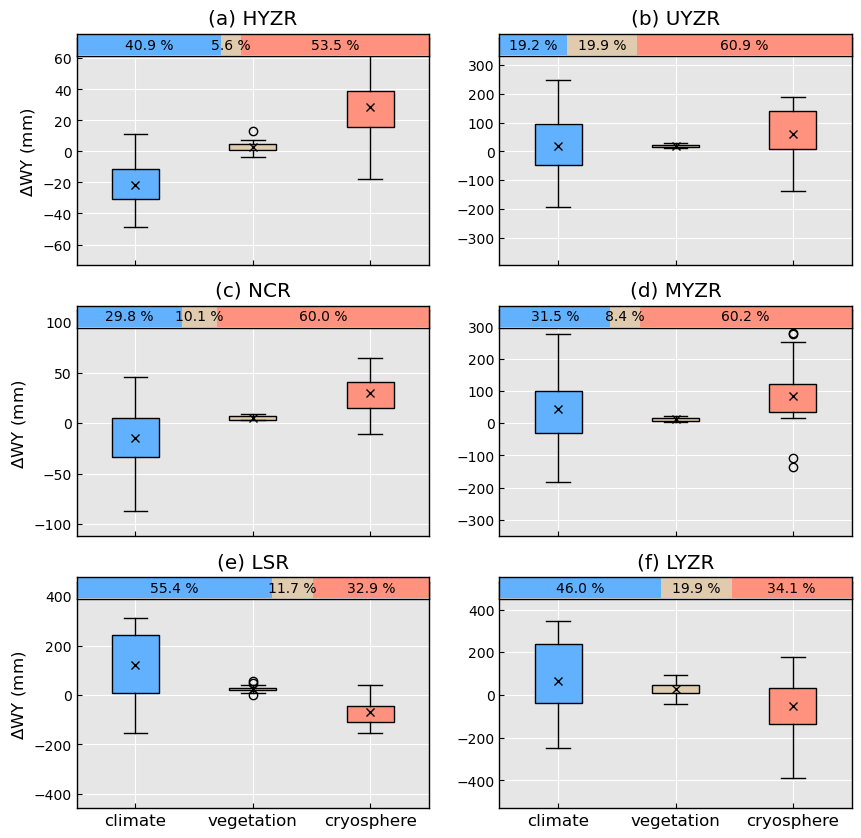

In [35]:
######################################################################
############################## plot (a) ##############################
######################################################################
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig = plt.figure(figsize=(10,10))
for i in range(len(names)):
    # preparation
    clima = climate_effects[climate_effects.index == names[i]]['climate']
    veget = vegetation_effects[vegetation_effects.index == names[i]]['climate']
    other = climate_effects[climate_effects.index == names[i]]['total'] - (clima + veget)
    # calculation on mean and std
    clima_mean = clima.mean(); veget_mean = veget.mean(); other_mean = other.mean()
    clima_std = clima.std()  ; veget_std = veget.std()  ; other_std = other.std()

    print(names[i], clima_mean, veget_mean, other_mean)
    # plotting
    ax = plt.subplot(3,2,i+1)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
    #plt.bar(x, [clima_mean, veget_mean, other_mean], width, yerr=[clima_std, veget_std, other_std], error_kw=dict(ecolor='grey', lw=1, capsize=7, capthick=1), color=colors, edgecolor='k', lw=1)
    x = [clima, veget, other]

    meanpointprops = dict(marker='x', markeredgecolor='black', markerfacecolor='black')
    flierprops     = dict(marker='o', markerfacecolor='none',  markeredgecolor='black')

    bp = ax.boxplot(x, positions=[1,2,3], widths=0.4, patch_artist=True, showmeans=True, meanprops=meanpointprops, flierprops=flierprops)
    for patch, color in zip(bp['boxes'], colors): patch.set_facecolor(color) 
    for median in bp['medians']: median.set(color ='red', linewidth = 0) 
    
    #plt.axhline(y=0, color='k', lw=0.5, ls='--')
    
    if i == 0 or i==2 or i==4:
        plt.ylabel(r'$\Delta$WY (mm)', fontsize=12, color='k')
    if i == 4 or i == 5:
        plt.xticks([1,2,3],['climate', 'vegetation', 'cryosphere'], fontsize=12, color='k')
    else:
        plt.xticks([1,2,3],[], fontsize=10)
    plt.tick_params(axis='x', which='both', top=False) 
    plt.ylim([-3*np.max([clima_std, veget_std, other_std]), 3*np.max([clima_std, veget_std, other_std])])
    
    # calculation on relative contribution
    total = np.abs(clima_mean) + np.abs(veget_mean) + np.abs(other_mean)
    rc_clima = np.abs(clima_mean)/total * 100
    rc_veget = np.abs(veget_mean)/total * 100
    rc_other = np.abs(other_mean)/total * 100
    ######################## plot percentage ########################
    ins = inset_axes(ax, width="100%", height="15%", loc=9, bbox_to_anchor=[0, 0.4, 1, 0.65], bbox_transform=ax.transAxes)
    ins.barh(0, rc_clima, color=colors[0])
    ins.barh(0, rc_veget, left=rc_clima, color=colors[1])
    ins.barh(0, rc_other, left=rc_clima+rc_veget, color=colors[2])
    
    ins.set_xticks([])
    ins.set_yticks([])
    ins.set_xlim([0,100])
    # annote the percentage
    for p in ins.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ins.text(x+width/2, y+height/2, '{:.1f} %'.format(width), horizontalalignment='center',verticalalignment='center')
    # add name
    ax.set_title(order[i] + ' ' + names[i], color='k', pad=10)
# plt.tight_layout()
# save
plt.savefig('../03-res/02-figures/attribution-in-magnitude.png',dpi=300, bbox_inches='tight')

## Direction attribution

/home/haohaoli/anaconda3/envs/geo/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


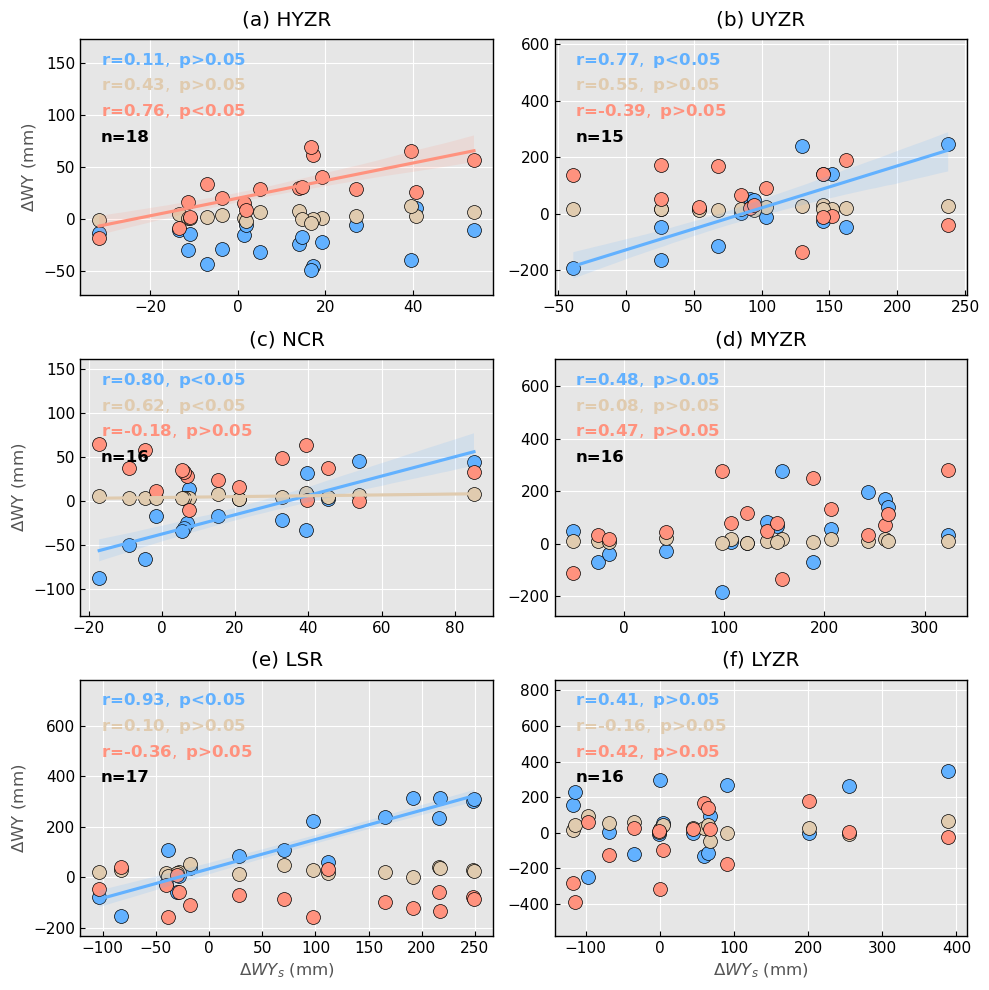

In [36]:
############## After TP
import pandas as pd
from scipy.stats import linregress
'''
plt.style.use('ggplot')
plt.rc('xtick', direction='in', color='k')
plt.rc('ytick', direction='in', color='k')
plt.rc('axes', facecolor='white', edgecolor='k', axisbelow=True, grid=True)
'''

"""
#62B1FF: precipitation; #E0CBAF: vegetation; #FF927E: croysphere
"""

fig = plt.figure(figsize=(10,10))
for i in range(len(names)):
    # load dataset
    total = climate_effects[climate_effects.index == names[i]]['total']
    clima = climate_effects[climate_effects.index == names[i]]['climate']
    veget = vegetation_effects[vegetation_effects.index == names[i]]['climate']
    other = total - (clima + veget)

    ax = plt.subplot(3,2,i+1)
    ax.tick_params(axis='both', which='major', labelsize=11)
    # climate
    plt.scatter(x=total, y=clima, color=colors[0], edgecolor='k', s=100)
    # vegetation
    plt.scatter(x=total, y=veget, color=colors[1], edgecolor='k', s=100)
    # cryosphere
    plt.scatter(x=total, y=other, color=colors[2], edgecolor='k', s=100)
    plt.ylim(1.5*np.min([clima, veget, other]), 2.5*np.max([clima, veget, other]))

    ### correct p values according to reviewers' comments
    import pingouin as pg
    p_array = [linregress(total, clima)[3], linregress(total, veget)[3], linregress(total, other)[3]]

    reject, pvals_corr = pg.multicomp(p_array, method='bonf')

    ### text 
    # climate
    if pvals_corr[0] < 0.05:
        ax.text(0.05, 0.90, 'r=%.2f'%linregress(total, clima)[2]+r'$,\ $'+'p<0.05', color=colors[0], fontsize=12, transform=ax.transAxes, weight='bold')
        sns.regplot(x=total, y=clima, color=colors[0], ci=80, truncate=True, marker='')
    else:
        ax.text(0.05, 0.90, 'r=%.2f'%linregress(total, clima)[2]+r'$,\ $'+'p>0.05', color=colors[0], fontsize=12, transform=ax.transAxes, weight='bold')
    # vegetation
    if pvals_corr[1] < 0.05:
        ax.text(0.05, 0.80, 'r=%.2f'%linregress(total, veget)[2]+r'$,\ $'+'p<0.05', color=colors[1], fontsize=12, transform=ax.transAxes, weight='bold')
        sns.regplot(x=total, y=veget, color=colors[1], ci=80, truncate=True, marker='')
    else:
        ax.text(0.05, 0.80, 'r=%.2f'%linregress(total, veget)[2]+r'$,\ $'+'p>0.05', color=colors[1], fontsize=12, transform=ax.transAxes, weight='bold')
    # cryosphere
    if pvals_corr[2] < 0.05:
        ax.text(0.05, 0.70, 'r=%.2f'%linregress(total, other)[2]+r'$,\ $'+'p<0.05', color=colors[2], fontsize=12, transform=ax.transAxes, weight='bold')
        sns.regplot(x=total, y=other, color=colors[2], ci=80, truncate=True, marker='')
    else:
        ax.text(0.05, 0.70, 'r=%.2f'%linregress(total, other)[2]+r'$,\ $'+'p>0.05', color=colors[2], fontsize=12, transform=ax.transAxes, weight='bold')

    # numbers
    ax.text(0.05, 0.6, 'n=%.0f'%((2013-1982+1)-tp[i]-1), fontsize=12, transform=ax.transAxes, weight='bold')

    # add name
    ax.set_title(order[i] + ' ' + names[i], color='k', pad=10)
    
    # labels 
    if i == 0 or  i == 2 or i == 4:
        ax.set_ylabel(r'$\Delta$WY (mm)', fontsize=12)
    else:
        ax.set_ylabel("")
    if i == 4 or i == 5:
        ax.set_xlabel(r'$\Delta WY_s$ (mm)', fontsize=12)
    else:
        ax.set_xlabel("")

plt.tight_layout()

# save
plt.savefig('../03-res/02-figures/contribution-relations.png',dpi=300, bbox_inches='tight')

## Peak water

In [37]:
def calculate_r_square(xobs, yobs):
    # import packages
    from scipy.optimize  import curve_fit
    from sklearn.metrics import r2_score
    # define functions
    def second_order_fit(x, a, b, c):
        return a*x**2 + b*x + c

    popt = curve_fit(second_order_fit, xobs, yobs)[0]

    yest = second_order_fit(xobs, *popt)
    r2 = r2_score(yobs, yest)
    '''
    plt.figure()
    plt.scatter(yobs, second_order_fit(xobs, *popt))
    '''
    return r2 

/tmp/ipykernel_736305/2947733408.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


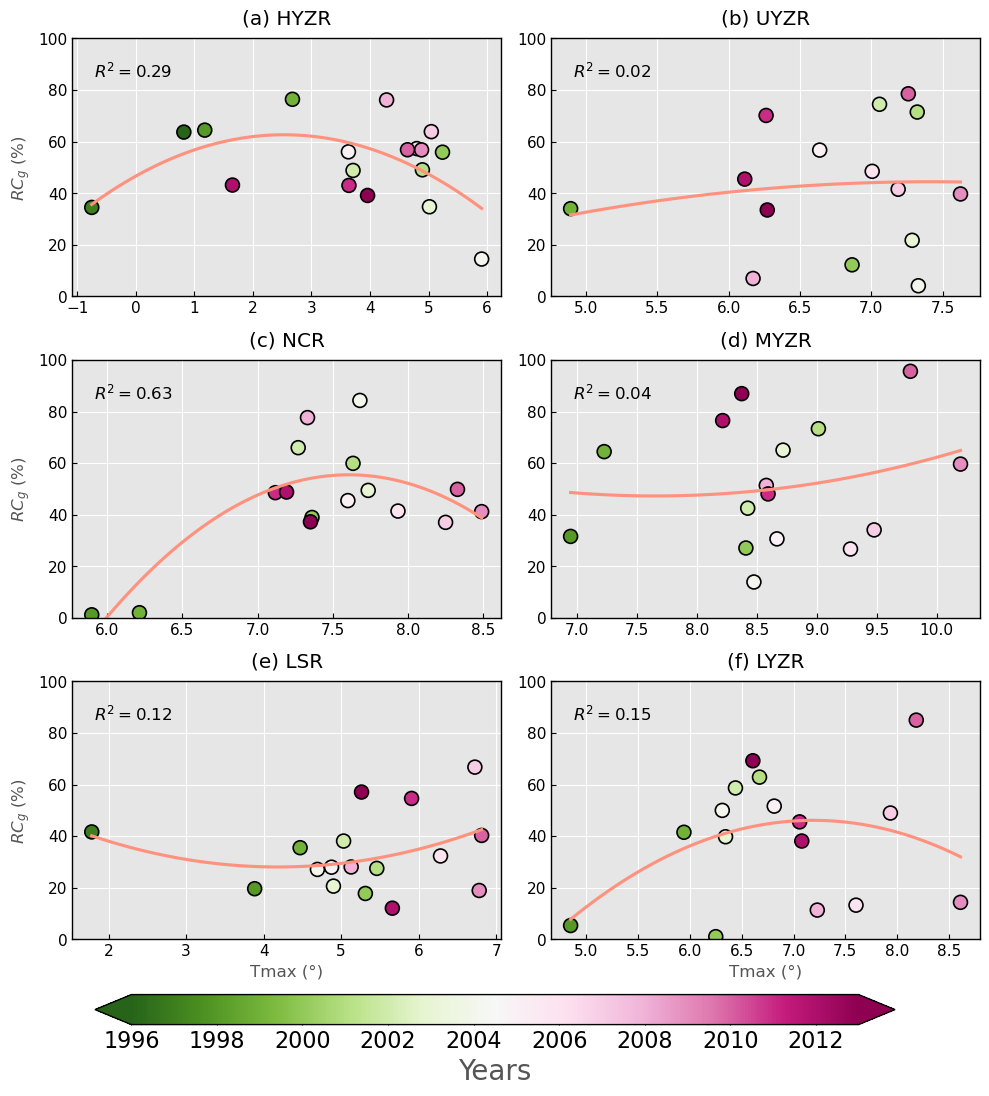

In [38]:
############## After TP
import pandas as pd
from scipy.stats import linregress
names = ['HYZR', 'UYZR', 'NCR', 'MYZR', 'LSR', 'LYZR']
tp    = [13, 16, 15, 15, 14, 15]
"""
#62B1FF: precipitation; #E0CBAF: vegetation; #FF927E: croysphere
"""
cmap = plt.cm.get_cmap('PiYG_r')
plt.style.use('ggplot')
plt.rc('xtick', direction='in', color='k')
plt.rc('ytick', direction='in', color='k')
plt.rc('axes', facecolor='#E6E6E6', edgecolor='k', axisbelow=True, grid=True)

fig = plt.figure(figsize=(10,10))
for i in range(len(names)):
    # load DMC dataset
    total = climate_effects[climate_effects.index == names[i]]['total']
    clima = climate_effects[climate_effects.index == names[i]]['climate']
    veget = vegetation_effects[vegetation_effects.index == names[i]]['climate']
    other = total - (clima + veget)

    # relative contribution
    other = 100 * np.abs(other) / (np.abs(clima)+np.abs(veget)+np.abs(other))

    # load tmax data
    warm = tmax[names[i]].iloc[tp[i]+1:]

    year = np.arange(1982 + np.int64(tp[i]) + 1, 2014)

    ax = plt.subplot(3,2,i+1)
    ax.tick_params(axis='both', which='major', labelsize=11)

    plt.scatter(x=warm, y=other, c=year, edgecolor='k', linewidth=1.2, s=100, vmin=1996, vmax=2013, cmap=cmap)
    sns.regplot(x=warm, y=other, color=colors[2], ci=0, truncate=True, marker='',  order=2)
    
    r2 = calculate_r_square(xobs=warm, yobs=other)

    ax.text(0.05, 0.85, '$R^2=%.2f$'%np.round(r2,2), color='k', fontsize=12, transform=ax.transAxes, weight='bold')

    ax.set_title(order[i] + ' ' + names[i], color='k', pad=10)

    if i == 0 or  i == 2 or i == 4:
        plt.ylabel(r'$RC_g$ (%)', fontsize=12)
    if i == 4 or i == 5:
        plt.xlabel('Tmax (°)', fontsize=12)
    else:
        plt.xlabel("")
    plt.ylim([0,100])

# colorbar
cax = fig.add_axes([0.1, -0.03, 0.8, 0.03])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=1996, vmax=2013))
sm._A = []
cbr = fig.colorbar(sm, cax=cax, orientation='horizontal', ticks=np.arange(1996,2014,2), extend='both')
cbr.set_label(label=r'Years', fontsize=20)
cbr.ax.tick_params(labelsize=16) 

plt.tight_layout()
# save
plt.savefig('../03-res/02-figures/peak-water-analysis.png',dpi=300, bbox_inches='tight')